In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
# image in BGR
image = cv2.imread("data/bird.jpg", flags=cv2.IMREAD_COLOR)

# convert to RGB
image = image[:, :, ::-1]
# or
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

row = image.shape[0]
col = image.shape[1]

x_train = np.zeros((row*col, 5))
count = 0
for i in range(row):
    for j in range(col):
        x_train[count, :] = [i, j, image[i, j, 0],
                             image[i, j, 1], image[i, j, 2]]
        count += 1

k_list = [2, 4]

## 1-1. cluster with only RGB values

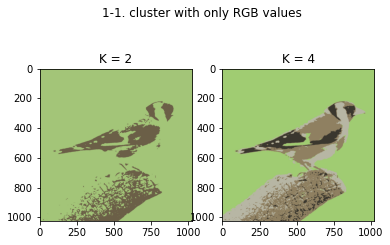

In [4]:
fig = plt.figure(1)
fig.suptitle("1-1. cluster with only RGB values")
for i, k in enumerate(k_list):
    model = KMeans(n_clusters=k, init='random', random_state=5)
    model.fit(x_train[:, 2:5])
    # center is the features(RGB) of each class
    # convert float to uint8
    center = np.uint8(model.cluster_centers_)
    pred_color = center[model.labels_]
    pred_color = pred_color.reshape(image.shape)

    plt.subplot(1, len(k_list), i+1)
    plt.title(f"K = {k}")
    plt.imshow(pred_color)
plt.show()

## 1-2. cluster with RGB values and the location

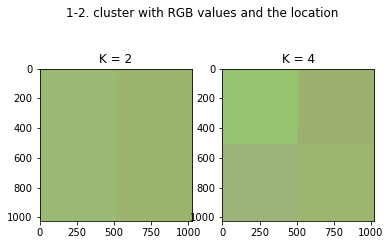

In [5]:
fig = plt.figure(2)
fig.suptitle("1-2. cluster with RGB values and the location")
for i, k in enumerate(k_list):
    model = KMeans(n_clusters=k, init='random', random_state=5)
    model.fit(x_train)

    center = np.uint8(model.cluster_centers_)
    center = center[:, 2:5]
    pred_color = center[model.labels_]
    pred_color = pred_color.reshape(image.shape)
    plt.subplot(1, len(k_list), i+1)
    plt.title(f"K = {k}")
    plt.imshow(pred_color)
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

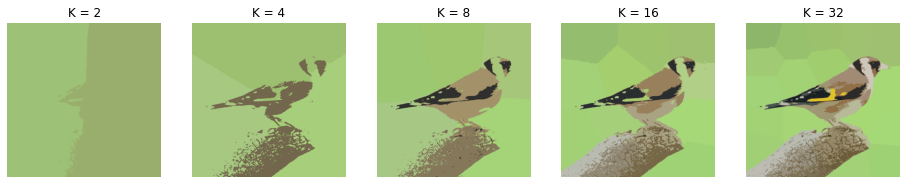